## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [ ]:
import pandas as pd
from pathlib import Path
%matplotlib inline


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [12]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path("Resources/bitstamp.csv"), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [13]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [14]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path("Resources/coinbase.csv"), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

In [15]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [16]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [17]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$","", regex=True)

### Step 3: Convert the data type of the Close column to a `float`.

In [18]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [19]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [20]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna()

coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("str")

coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "", regex=True)

coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [24]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, "Close"]


# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [25]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [26]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [27]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Exchange'}, xlabel='Timestamp'>

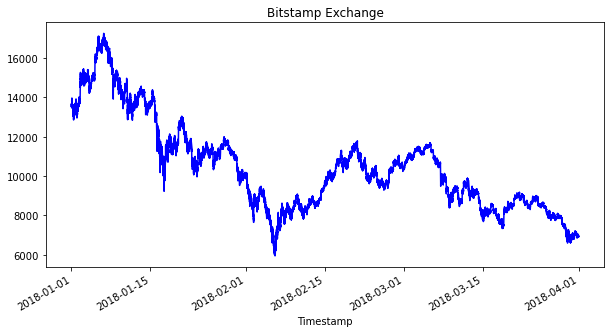

In [28]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(10,5), title="Bitstamp Exchange", color="blue")

<AxesSubplot:title={'center':'Coinbase Exchange'}, xlabel='Timestamp'>

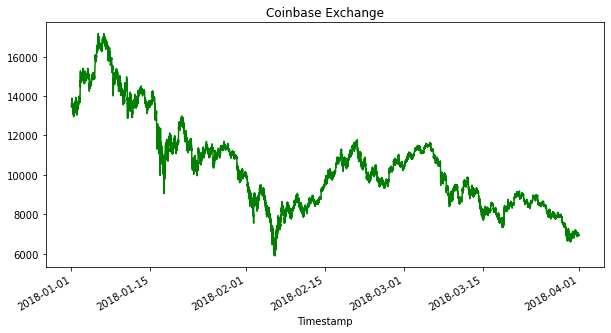

In [29]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(10,5), title="Coinbase Exchange", color="green")

<AxesSubplot:title={'center':'Bitstamp and Coinbase exchanges'}, xlabel='Timestamp'>

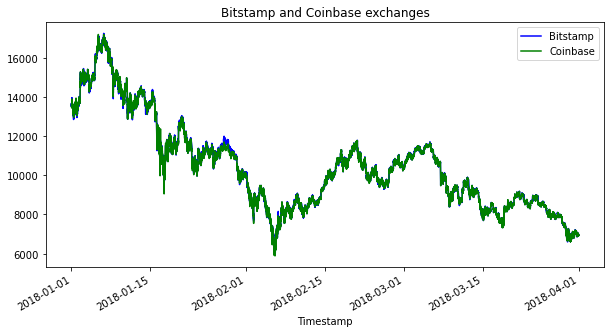

In [30]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True, figsize=(10,5), title="Bitstamp and Coinbase exchanges", color="blue", label="Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(10,5), color="green", label="Coinbase")    

<AxesSubplot:title={'center':'Jan 1st, 2015 - Feb 15th, 2015 Exchange Differences'}, xlabel='Timestamp'>

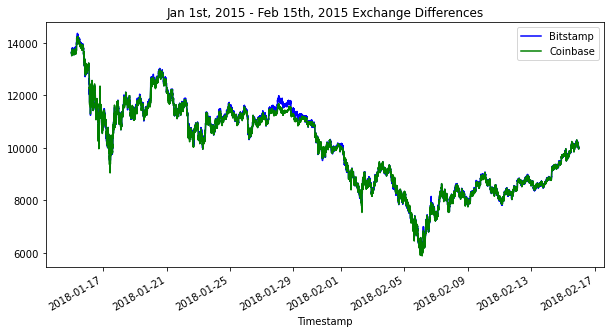

In [42]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc["2018-01-15":"2018-02-15"].plot(
    legend=True, figsize=(10,5), title="Jan 1st, 2015 - Feb 15th, 2015 Exchange Differences", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-01-15":"2018-02-15"].plot(
    legend=True, figsize=(10,5), color="green", label="Coinbase")

<AxesSubplot:title={'center':'Mar 1st, 2015 - Apr 1st, 2015 Exchange Differences'}, xlabel='Timestamp'>

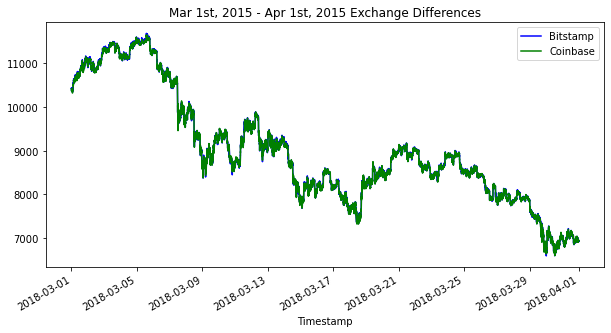

In [48]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc["2018-03-01":"2018-04-01"].plot(
    legend=True, figsize=(10,5), title="Mar 1st, 2015 - Apr 1st, 2015 Exchange Differences", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-03-01":"2018-04-01"].plot(
    legend=True, figsize=(10,5), color="green", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** 
When evaluating the spread between the two exchanges, the spread between the prices decreases as time progresses. This is evident when comparing the two graphs from an early month and a later month during the time frame. The graph illustrating the spread in the early months visually shows a more significant price gap between the two exchanges, espcially between later Jan and early Feb. These large gaps become less frequent, in later period and shows little to no significant visual price gaps. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Janurary 18th, 2015 Price Differences'}, xlabel='Timestamp'>

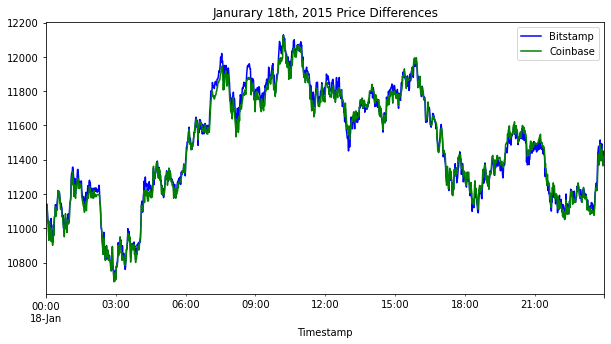

In [49]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc["2018-01-18"].plot(
    legend=True, figsize=(10,5), title="Janurary 18th, 2015 Price Differences", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-01-18"].plot(
    legend=True, figsize=(10,5), color="green", label="Coinbase")

In [55]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced.loc["2018-01-14"] - bitstamp_sliced.loc["2018-01-14"]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1439.000000
mean       16.685274
std        34.341516
min       -89.260000
25%        -4.995000
50%        14.980000
75%        35.975000
max       468.000000
Name: Close, dtype: float64

<AxesSubplot:>

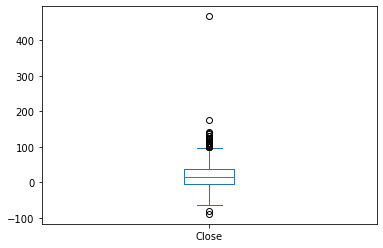

In [56]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box")

<AxesSubplot:title={'center':'Janurary 28th, 2015 Price Differences'}, xlabel='Timestamp'>

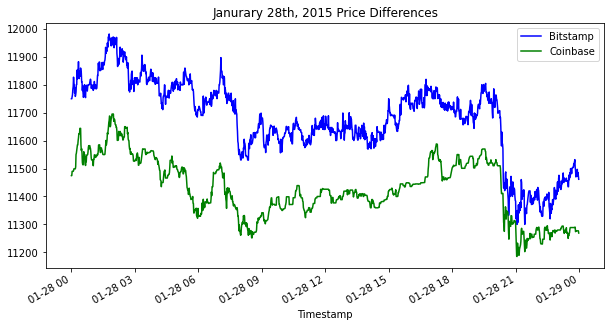

In [60]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc["2018-01-28"].plot(
    legend=True, figsize=(10,5), title="Janurary 28th, 2015 Price Differences", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-01-28"].plot(
    legend=True, figsize=(10,5), color="green", label="Coinbase")

In [61]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc["2018-01-28"] - bitstamp_sliced.loc["2018-01-28"]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1436.000000
mean     -247.552326
std        68.343472
min      -439.010000
25%      -290.925000
50%      -251.180000
75%      -210.022500
max       -55.030000
Name: Close, dtype: float64

<AxesSubplot:>

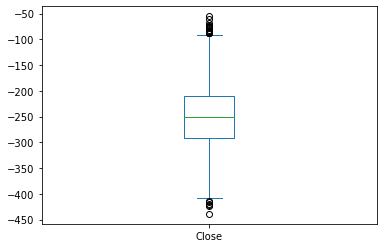

In [62]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box")

<AxesSubplot:title={'center':'March 17th, 2015 Price Differences'}, xlabel='Timestamp'>

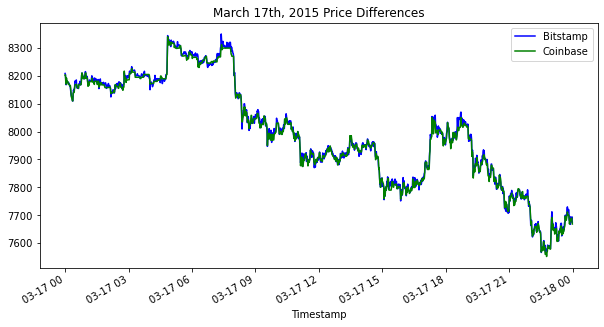

In [64]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc["2018-03-17"].plot(
    legend=True, figsize=(10,5), title="March 17th, 2015 Price Differences", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-03-17"].plot(
    legend=True, figsize=(10,5), color="green", label="Coinbase")

In [65]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced.loc["2018-03-17"] - bitstamp_sliced.loc["2018-03-17"]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1409.000000
mean       -3.981668
std         8.903643
min       -55.000000
25%        -9.290000
50%        -3.690000
75%         1.690000
max        25.890000
Name: Close, dtype: float64

<AxesSubplot:>

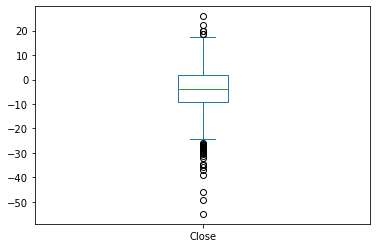

In [66]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [76]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced.loc["2018-01-18"] - coinbase_sliced.loc["2018-01-18"]
arbitrage_spread_middle = bitstamp_sliced.loc["2018-01-28"] - coinbase_sliced.loc["2018-01-28"]
arbitrage_spread_late = bitstamp_sliced.loc["2018-03-17"] - coinbase_sliced.loc["2018-03-17"]



# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
display(arbitrage_spread_early[arbitrage_spread_early > 0].describe())

display(arbitrage_spread_middle[arbitrage_spread_middle > 0].describe())

display(arbitrage_spread_late[arbitrage_spread_late > 0].describe())


count    891.000000
mean      30.889439
std       20.877704
min        0.010000
25%       15.195000
50%       27.550000
75%       43.555000
max      121.730000
Name: Close, dtype: float64

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

count    949.000000
mean       8.494805
std        6.759243
min        0.010000
25%        3.560000
50%        6.990000
75%       11.350000
max       55.000000
Name: Close, dtype: float64

## 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [80]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / coinbase_sliced.loc["2018-01-18"]
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / coinbase_sliced.loc["2018-01-28"]
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / coinbase_sliced.loc["2018-03-17"]

# Review the spread return DataFrame
display(spread_return_early.head(15))
display(spread_return_middle.head(15))
display(spread_return_late.head(15))

Timestamp
2018-01-18 00:00:00    0.001424
2018-01-18 00:01:00         NaN
2018-01-18 00:02:00         NaN
2018-01-18 00:03:00         NaN
2018-01-18 00:04:00    0.001719
2018-01-18 00:05:00         NaN
2018-01-18 00:06:00    0.001837
2018-01-18 00:07:00    0.002867
2018-01-18 00:08:00         NaN
2018-01-18 00:09:00         NaN
2018-01-18 00:10:00    0.002602
2018-01-18 00:11:00    0.000347
2018-01-18 00:12:00    0.002603
2018-01-18 00:13:00    0.005165
2018-01-18 00:14:00    0.003748
Name: Close, dtype: float64

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
2018-01-28 00:05:00    0.026465
2018-01-28 00:06:00    0.029151
2018-01-28 00:07:00    0.026618
2018-01-28 00:08:00    0.026180
2018-01-28 00:09:00    0.023577
2018-01-28 00:10:00    0.025307
2018-01-28 00:11:00    0.022555
2018-01-28 00:12:00    0.022421
2018-01-28 00:13:00    0.019390
2018-01-28 00:14:00    0.021284
Name: Close, dtype: float64

Timestamp
2018-03-17 00:00:00    0.000668
2018-03-17 00:01:00    0.000271
2018-03-17 00:02:00    0.000913
2018-03-17 00:03:00         NaN
2018-03-17 00:04:00         NaN
2018-03-17 00:05:00    0.000392
2018-03-17 00:06:00         NaN
2018-03-17 00:07:00         NaN
2018-03-17 00:08:00         NaN
2018-03-17 00:09:00    0.000603
2018-03-17 00:10:00    0.000793
2018-03-17 00:11:00         NaN
2018-03-17 00:12:00         NaN
2018-03-17 00:13:00         NaN
2018-03-17 00:14:00         NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [81]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]
profitable_trades_late = spread_return_late[spread_return_late > .01]


# Review the first five profitable trades
display(profitable_trades_early.head(10))
display(profitable_trades_middle.head(10))
display(profitable_trades_late.head(10))

Timestamp
2018-01-18 10:03:00    0.01018
Name: Close, dtype: float64

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
2018-01-28 00:05:00    0.026465
2018-01-28 00:06:00    0.029151
2018-01-28 00:07:00    0.026618
2018-01-28 00:08:00    0.026180
2018-01-28 00:09:00    0.023577
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [83]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trades_early.describe())
display(profitable_trades_middle.describe())
display(profitable_trades_late.describe())

count    1.00000
mean     0.01018
std          NaN
min      0.01018
25%      0.01018
50%      0.01018
75%      0.01018
max      0.01018
Name: Close, dtype: float64

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [90]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced.loc["2018-01-18"]
profit_middle = profitable_trades_middle * coinbase_sliced.loc["2018-01-28"]
profit_late = profitable_trades_late * coinbase_sliced.loc["2018-03-17"]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
display(profit_per_trade_early)
display(profit_per_trade_middle)
display(profit_per_trade_late)

Timestamp
2018-01-18 10:03:00    121.73
Name: Close, dtype: float64

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1378, dtype: float64

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [91]:
# Generate the summary statistics for the early profit per trade DataFrame
display(profit_per_trade_early.describe())
display(profit_per_trade_middle.describe())
display(profit_per_trade_late.describe())


count      1.00
mean     121.73
std         NaN
min      121.73
25%      121.73
50%      121.73
75%      121.73
max      121.73
Name: Close, dtype: float64

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profits per Trade'}, xlabel='Timestamp'>

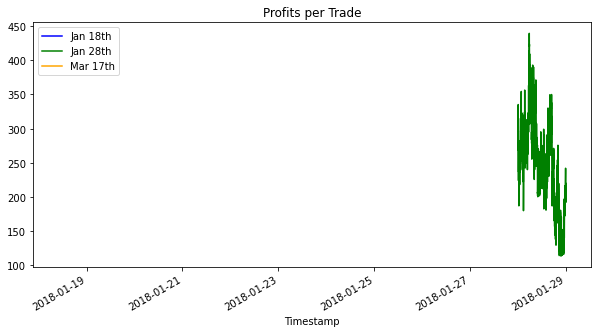

In [94]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(
    legend=True, figsize=(10,5), title="Profits per Trade", color="blue", label="Jan 18th")
profit_per_trade_middle.plot(
    legend=True, figsize=(10,5), color="green", label="Jan 28th")
profit_per_trade_late.plot(
    legend=True, figsize=(10,5), color="orange", label="Mar 17th")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [95]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_late = profit_per_trade_late.sum()

display(profit_sum_early)
display(profit_sum_middle)
display(profit_sum_late)

121.73000000000138

349918.2900000001

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [97]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Profit Per Trade'}, xlabel='Timestamp'>

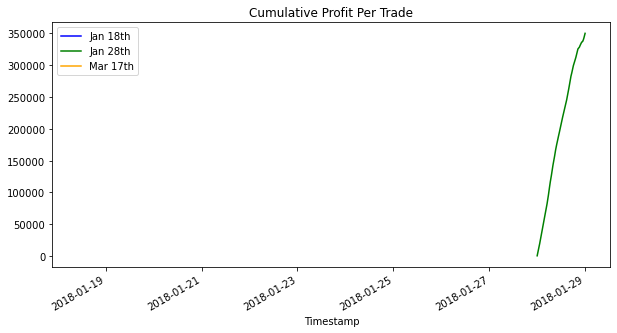

In [98]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(
    legend=True, figsize=(10,5), title="Cumulative Profit Per Trade", color="blue", label="Jan 18th")
cumulative_profit_middle.plot(
    legend=True, figsize=(10,5), color="green", label="Jan 28th")
cumulative_profit_late.plot(
    legend=True, figsize=(10,5), color="orange", label="Mar 17th")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** 
When referring to the original overlay plot of the two exchanges, there was a two to a three-day trading period where there were massive price discrepancies between the two exchanges. Analyzing the results from January 28th, a trading day during the big spread, resulted in $349,918.29 in profits. After this good day, however, the price began to revert to the mean. This happens when traders buy the low price, which pumps the lower-priced exchange higher, and then simultaneously sells it on the higher-priced exchange, lowering the price until the two exchanges are back in harmony. This is very noticeable later in the trading period, as there were no profitable trades on March 17th. 